# Project Case Scenario

## Project Scenario:
You are a Data Scientist with a housing agency in Boston, MA. You have been given access to a dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your expertise in statistics, your task is to provide insights that will help management make informed decisions. 

Upper management is particularly interested in the following questions:

1. **Is there a significant difference in the median value of houses bounded by the Charles River or not?**

2. **Is there a difference in median values of houses for each proportion of owner-occupied units built before 1940?**

3. **Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?**

4. **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?**

## Objective:
Using appropriate graphs and statistical techniques:
- Generate basic statistics and visualizations to provide useful insights to upper management.
- Include an explanation of each statistic and visualization to address the questions above.

---

In [4]:
import io

import matplotlib.pyplot as pyplot
import pandas as pd
import requests
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option("display.max_columns", 4000)
pd.set_option("display.min_rows", 10000)
pd.set_option("display.max_rows", 10000)
pd.set_option("display.expand_frame_repr", True)
pd.set_option("display.max_colwidth", None)

## Get the Data - Become Familiar with the Dataset

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxides concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centres.
- **RAD**: Index of accessibility to radial highways.
- **PTRATIO**: Pupil-teacher ratio by town.
- **MEDV**: Median value of owner-occupied homes in
- **LSTAT**: Percentage of lower status of the population.
- **TAX**: Full-value property-tax rate per

In [6]:
# Fetching the data
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"
response = requests.get(data_url)

# check on respons status
if response.status_code == 200:
    boston_data = io.StringIO(response.text)
    # You can now use pandas to read the data
    import pandas as pd

    boston_df = pd.read_csv(boston_data)
    display(boston_df.head())
else:
    print(f"Failed to fetch data. HTTP status code: {response.status_code}")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [39]:
# Get basic statistics for numerical columns
boston_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


## Task #2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:

- 2.1 For the "Median value of owner-occupied homes" provide a **boxplot**.
- 2.2 Provide a **bar plot** for the Charles river variable.
- 2.3 Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older).
- 2.4 Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- 2.5 Create a **histogram** for the pupil-to-teacher ratio variable.

### Task #2.1 - "Median value of owner-occupied homes" (MEDEV) boxplot

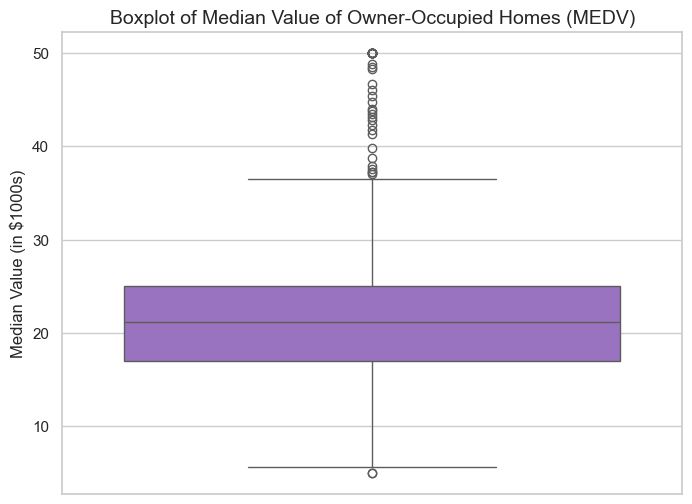

In [18]:
# For the "Median value of owner-occupied homes" (MEDEV) provide a boxplot

# Set the style
sns.set(style="whitegrid")

# Create the boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(
    data=boston_df,
    y="MEDV",
    color=(0.6, 0.4, 0.8),
)

# Add title and labels
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)", fontsize=14)
pyplot.ylabel("Median Value (in $1000s)", fontsize=12)

# Display the plot
pyplot.show()

### Task 2.2: - **bar plot** for the Charles river variable

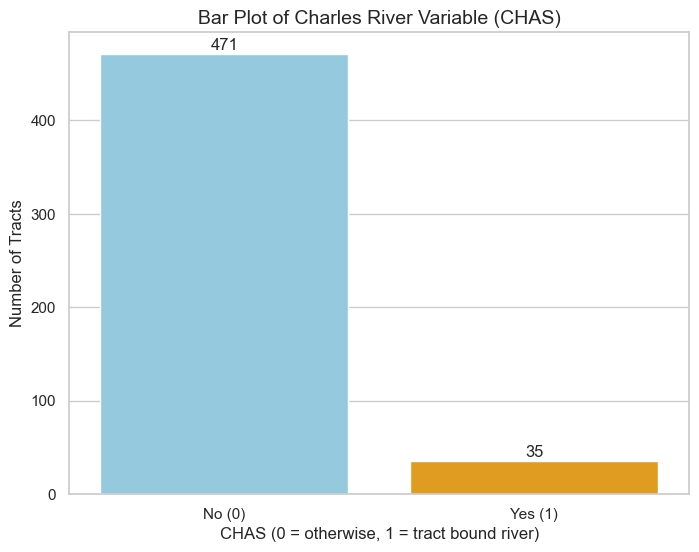

In [30]:
# Prepare the data for plotting
chas_counts = boston_df["CHAS"].value_counts().reset_index()
chas_counts.columns = ["CHAS", "Counts"]

# Create a new column for hue (mapping CHAS to categorical values)
chas_counts["Category"] = chas_counts["CHAS"].map({0: "No (0)", 1: "Yes (1)"})

# Set the style
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 6))

# Use hue to color different categories
barplot = sns.barplot(
    data=chas_counts,
    x="Category",
    y="Counts",
    hue="Category",
    dodge=False,  # Avoid splitting bars
    palette={"No (0)": "skyblue", "Yes (1)": "orange"},
)

# Annotate the bars with their values
for i, bar in enumerate(barplot.patches):
    bar_height = bar.get_height()
    pyplot.text(bar.get_x() + bar.get_width() / 2, bar_height + 5, int(bar_height), ha="center", fontsize=12)

# Add title and labels
pyplot.title("Bar Plot of Charles River Variable (CHAS)", fontsize=14)
pyplot.xlabel("CHAS (0 = otherwise, 1 = tract bound river)", fontsize=12)
pyplot.ylabel("Number of Tracts", fontsize=12)
pyplot.legend([], [], frameon=False)  # Hide legend if unnecessary

# Display the plot
pyplot.show()

## Task 2.3

**boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older).

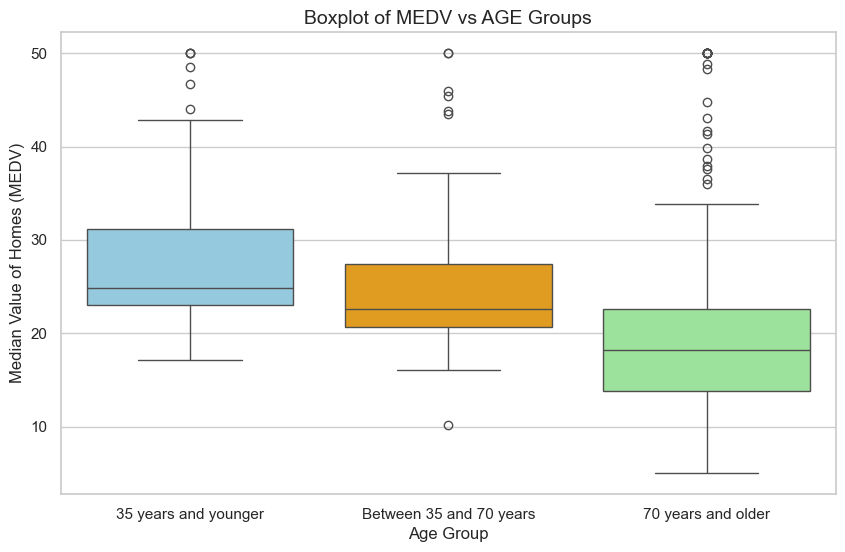

In [41]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]  # Define bins
labels = ["35 years and younger", "Between 35 and 70 years", "70 years and older"]
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)

# Set the style
sns.set(style="whitegrid")

# Create the boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(
    data=boston_df,
    x="AGE_Group",
    y="MEDV",
    hue="AGE_Group",  # Assigning the AGE_Group as hue
    dodge=False,  # Prevent splitting by hue
    palette={
        "35 years and younger": "skyblue",
        "Between 35 and 70 years": "orange",
        "70 years and older": "lightgreen",
    },  # Map colors to categories
)

# Add title and labels
pyplot.title("Boxplot of MEDV vs AGE Groups", fontsize=14)
pyplot.xlabel("Age Group", fontsize=12)
pyplot.ylabel("Median Value of Homes (MEDV)", fontsize=12)
pyplot.legend([], [], frameon=False)  # Hide the legend if not needed

# Display the plot
pyplot.show()

## Task 2.4

**scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

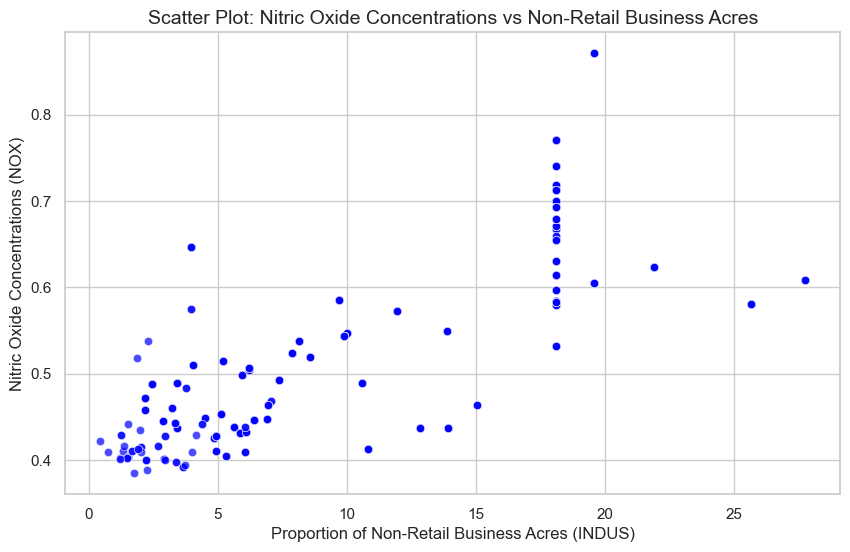

In [36]:
# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
pyplot.figure(figsize=(10, 6))
sns.scatterplot(data=boston_df, x="INDUS", y="NOX", color="blue", alpha=0.7)

# Add title and labels
pyplot.title("Scatter Plot: Nitric Oxide Concentrations vs Non-Retail Business Acres", fontsize=14)
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)", fontsize=12)
pyplot.ylabel("Nitric Oxide Concentrations (NOX)", fontsize=12)

# Display the plot
pyplot.show()

### What can you say about the relationship?
---

#### Observations from the Scatter Plot:
1. **Positive Correlation**:
   - There is a general positive relationship between Nitric Oxide concentrations (`NOX`) and the proportion of non-retail business acres (`INDUS`). As the proportion of non-retail business acres increases, the Nitric Oxide concentration also tends to increase.

2. **Clusters**:
   - There are clusters of data at lower values of `INDUS` (0 to 10), suggesting towns with smaller proportions of non-retail business acres often have lower `NOX` concentrations.

3. **Non-Linear Trend**:
   - While the relationship is positively correlated, it is not perfectly linear. Beyond an `INDUS` value of 15, the increase in `NOX` becomes less pronounced.

4. **Implication**:
   - Higher industrial activity, as indicated by higher `INDUS`, is likely associated with higher `NOX` concentrations due to emissions from industrial sources.

---

#### Statistical Test: Pearson Correlation

##### Steps:
1. Calculate the **Pearson correlation coefficient**:
   - This measures the strength and direction of the linear relationship between `NOX` and `INDUS`.
   - Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).

2. Check the **P-value**:
   - Tests whether the observed correlation is statistically significant.
   - If the P-value is less than 0.05 (α = 0.05), we reject the null hypothesis and conclude there is a significant correlation.

---

#### Code for Pearson Correlation:

```python
from scipy.stats import pearsonr

# Extract NOX and INDUS columns
nox = boston_df["NOX"]
indus = boston_df["INDUS"]

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(indus, nox)

# Print results
alpha = 0.05
print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

if p_value < alpha:
    print("Conclusion: There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion: There is no significant correlation between NOX and INDUS.")
```

---

#### Results Interpretation:
- **Correlation Coefficient**:
   - A value close to +1 indicates a strong positive correlation.
   - A value close to 0 indicates little to no correlation.
- **P-value**:
   - A P-value less than 0.05 confirms that the correlation is statistically significant.
- **Conclusion**:
   - Based on the results, you can confirm whether the relationship observed in the scatter plot is meaningful or due to random variation.

## Task 2.5

**histogram** for the pupil-to-teacher ratio variable

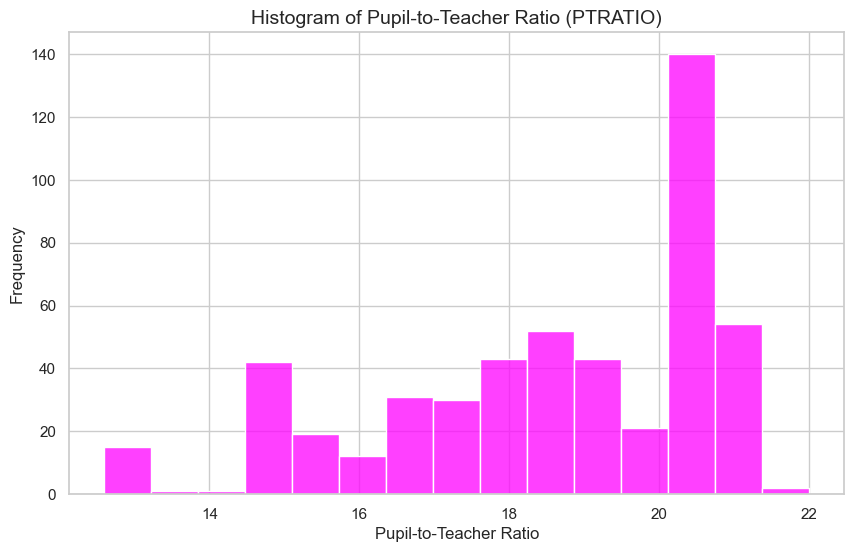

In [42]:
# Set the style
sns.set(style="whitegrid")

# Create the histogram
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df["PTRATIO"], bins=15, kde=False, color="magenta")

# Add title and labels
pyplot.title("Histogram of Pupil-to-Teacher Ratio (PTRATIO)", fontsize=14)
pyplot.xlabel("Pupil-to-Teacher Ratio", fontsize=12)
pyplot.ylabel("Frequency", fontsize=12)

# Display the plot
pyplot.show()

---
## **Task 3**: Use the appropriate tests to answer the questions provided.

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

## Question #1 - task 3.1

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypotheses:
- \( H_0 \): There is no significant difference in median house values (\( MEDV \)) between houses bounded by the Charles river (\( CHAS = 1 \)) and those not bounded \( CHAS = 0 \).
- \( H_a \): There is a significant difference in median house values between the two groups.

#### Assumptions:
1. The data is approximately normally distributed for both groups.
2. The two groups are independent.

In [44]:
from scipy.stats import ttest_ind

# Split the data into two groups
chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]

# Perform the T-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Print results
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in MEDV between the two groups."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in MEDV between the two groups."

print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(conclusion)

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in MEDV between the two groups.


**Results Interpretation**:  
- **T-statistic**: Measures the size of the difference relative to the variation in your sample data.
- **P-value**: Tests the likelihood of observing the data if the null hypothesis is true.

Based on the results, decide whether the difference in median house values is statistically significant.

---

## Question #2 - task 3.2

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypotheses:
- \( H_0 \): There is no significant difference in \( MEDV \) across the three age groups.
- \( H_a \): There is a significant difference in \( MEDV \) across the three age groups.

In [46]:
from scipy.stats import f_oneway

# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ["35 years and younger", "Between 35 and 70 years", "70 years and older"]
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)

# Group MEDV by AGE_Group
group_1 = boston_df[boston_df["AGE_Group"] == "35 years and younger"]["MEDV"]
group_2 = boston_df[boston_df["AGE_Group"] == "Between 35 and 70 years"]["MEDV"]
group_3 = boston_df[boston_df["AGE_Group"] == "70 years and older"]["MEDV"]

# Perform ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Set the significance level
alpha = 0.05

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in MEDV across AGE groups.")
else:
    print(
        "Conclusion: Fail to reject the null hypothesis. There is no significant difference in MEDV across AGE groups."
    )

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in MEDV across AGE groups.


**Results Interpretation**
- **F-statistic**: Measures the ratio of variance between groups to variance within groups.
- **P-value**: Tests the likelihood of observing the data if the null hypothesis is true.

Based on the results, it can be conclude whether the age of houses impacts their median value significantly. Let me know if you need further clarification or additional analysis!

---

## Question #3 - task 3.3

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

##### Hypotheses:
- **Null Hypothesis (\(H_0\))**: There is no relationship (correlation) between `NOX` and `INDUS`.
- **Alternative Hypothesis (\(H_a\))**: There is a relationship (correlation) between `NOX` and `INDUS`.

##### Steps:
1. Calculate the **Pearson correlation coefficient** to measure the strength and direction of the linear relationship.
2. Calculate the **P-value** to test the null hypothesis.


In [47]:
from scipy.stats import pearsonr

# Extract NOX and INDUS columns
nox = boston_df["NOX"]
indus = boston_df["INDUS"]

# Perform Pearson correlation
corr_coefficient, p_value = pearsonr(indus, nox)

# Set the significance level
alpha = 0.05

# Print results
print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241263e-98
Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


**Results Interpretation**:
- **Correlation Coefficient**:
   - If the coefficient is close to 1 or -1, the relationship is strong.
   - If the coefficient is near 0, the relationship is weak or nonexistent.
- **P-value**:
   - A small P-value (\( < 0.05 \)) indicates the observed correlation is unlikely to have occurred by chance.


## Question #4 - task 3.4

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Hypotheses:
- **Null Hypothesis (\(H_0\))**: The weighted distance to employment centers (`DIS`) has no impact on median house values (`MEDV`).
- **Alternative Hypothesis (\(H_a\))**: The weighted distance to employment centers (`DIS`) has a significant impact on median house values (`MEDV`).

#### Steps:
1. Define `DIS` as the independent variable (predictor).
2. Define `MEDV` as the dependent variable (response).
3. Perform a simple linear regression analysis.
4. Evaluate the model and interpret the results.


In [48]:
import statsmodels.api as sm

# Define the independent (X) and dependent (y) variables
X = boston_df["DIS"]
y = boston_df["MEDV"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Interpret the p-value and coefficient of DIS
p_value_dis = model.pvalues["DIS"]
coeff_dis = model.params["DIS"]
alpha = 0.05

print(f"P-value for DIS: {p_value_dis}")
print(f"Coefficient for DIS: {coeff_dis}")

if p_value_dis < alpha:
    print("Conclusion: Reject the null hypothesis. DIS has a significant impact on MEDV.")
else:
    print("Conclusion: Fail to reject the null hypothesis. DIS does not have a significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        13:52:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Results Interpretation**
- **Coefficient**:
   - If positive, an increase in `DIS` increases `MEDV`.
   - If negative, an increase in `DIS` decreases `MEDV`.

- **P-value**:
   - If \( P\text{-value} < 0.05 \), the relationship is statistically significant.

- **R-squared**:
   - Explains the proportion of variation in `MEDV` that is explained by `DIS`.